# Common regulatory pathways mediate activity of microRNAs inducing cardiomyocyte proliferation

Consuelo Torrini, Ryan Cubero, Ellen Dirkx, Luca Braga, Hashim Ali, Giulia Prosdocimo, Maria Ines Gutierrez, Chiara Collesi, Danilo Licastro, Miguel Mano, Michele Vendruscolo, Matteo Marsili, Areejit Samal, Mauro Giacca

---
### Supplementary Material
This IPython notebook supplements the bioinformatic analyses done in the paper.

In [1]:
%matplotlib inline

from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import networkx as nx
import os

from collections import Counter

plt.rcParams['axes.facecolor'] = 'white'
def RedBlackGreen():
    cdict = {'red':   ((0.0, 0.0, 0.0),(0.5, 0.0, 0.1),(1.0, 1.0, 1.0)),
             'blue': ((0.0, 0.0, 0.0),(1.0, 0.0, 0.0)),
             'green':  ((0.0, 0.0, 1.0),(0.5, 0.1, 0.0),(1.0, 0.0, 0.0))
            }
    my_cmap = mpl.colors.LinearSegmentedColormap('my_colormap',cdict,256)
    return my_cmap

from matplotlib import rc
rc('font',**{'family':'serif','serif':['Times']})
rc('ps', useafm=True)
rc('pdf', use14corefonts=True)
# rc('pdf', fonttype=42)
rc('text', usetex=True)
rc('svg', fonttype='none')

In [2]:
home_dir = "/Users/rcubero/Google Drive/Rat_RNASeq_Analysis/NCBI_RNASeq/"
dictionary = "/Users/rcubero/Google Drive/Rat_RNASeq_Analysis/NCBI_RNASeq/Dictionary/"
geneset_result_dir = "/Users/rcubero/Google Drive/Rat_RNASeq_Analysis/Manuscript/Figures/Final/"

In [3]:
# Load Giacca Lab rat RNASeq and keep only relevant information

### ANNOTATION: NCBI Rattus norvegicus annotation 104
NCBI_RNASeq = pd.read_csv(home_dir+"RNASeq/NCBI_RNASeq.csv",delimiter=',',header=0)
NCBI_RNASeq = NCBI_RNASeq[['Unnamed: 0','NCBI.GeneID','lipo','mir.1825','mir.199','mir.302d','mir.33b','mir.373','mir.590','mir.67']]
NCBI_RNASeq.columns = ['RNASeq_Entry','NCBI_GeneID','lipo','mir.1825','mir.199','mir.302d','mir.33b','mir.373','mir.590','mir.67']

In [7]:
# Take note of the miRNA names
Consuelo_miRNA = NCBI_RNASeq.columns[3:9]
Consuelo_miRNA_names = ["miR-1825", "miR-199a-3p", "miR-302d", "miR-33b*", "miR-373", "miR-590-3p"]

In [5]:
# Set cut-offs
RPKM_cutoff = 1.0
FC_cutoff = 1.3

In [6]:
for miRNA in Consuelo_miRNA:
    NCBI_RNASeq[miRNA+"_RPKM"] = ((NCBI_RNASeq[miRNA]>=RPKM_cutoff)&(NCBI_RNASeq["mir.67"]>=RPKM_cutoff)).astype("int")

In [8]:
# Take fold change expressions with respect to cel-miR-67
for miRNA in Consuelo_miRNA:
    NCBI_RNASeq[miRNA+"_FC"] = (NCBI_RNASeq[miRNA]).divide(NCBI_RNASeq['mir.67'])
NCBI_RNASeq = NCBI_RNASeq.reset_index(drop=True)

In [10]:
NCBI_RNASeq["lipo_RPKM"] = ((NCBI_RNASeq[miRNA]>=RPKM_cutoff)&(NCBI_RNASeq["mir.67"]>=RPKM_cutoff)).astype("int")
NCBI_RNASeq["lipo_FC"] = (NCBI_RNASeq['lipo']).divide(NCBI_RNASeq['mir.67'])

lipo_UPG = list(set(NCBI_RNASeq[NCBI_RNASeq["lipo_RPKM"] == 1].loc[np.log2(NCBI_RNASeq["lipo_FC"])>=np.log2(FC_cutoff)].NCBI_GeneID.values))
lipo_DNG = list(set(NCBI_RNASeq[NCBI_RNASeq["lipo_RPKM"] == 1].loc[np.log2(NCBI_RNASeq["lipo_FC"])<=-np.log2(FC_cutoff)].NCBI_GeneID.values))

/Users/rcubero/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:4: RuntimeWarning: divide by zero encountered in log2
/Users/rcubero/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:5: RuntimeWarning: divide by zero encountered in log2


In [11]:
np.savetxt(geneset_result_dir+"NCBI_UPG_lipo.txt",np.array(list(lipo_UPG)), delimiter="\n", fmt="%s")
np.savetxt(geneset_result_dir+"NCBI_DNG_lipo.txt",np.array(list(lipo_DNG)), delimiter="\n", fmt="%s")

In [15]:
NCBI_UPG_geneset = {}; NCBI_DNG_geneset = {};
for miRNA in Consuelo_miRNA:
    NCBI_UPG_geneset[miRNA] = list(set(NCBI_RNASeq[NCBI_RNASeq[miRNA+"_RPKM"] == 1].loc[np.log2(NCBI_RNASeq[miRNA+"_FC"])>=np.log2(FC_cutoff)].NCBI_GeneID.values))
    NCBI_DNG_geneset[miRNA] = list(set(NCBI_RNASeq[NCBI_RNASeq[miRNA+"_RPKM"] == 1].loc[np.log2(NCBI_RNASeq[miRNA+"_FC"])<=-np.log2(FC_cutoff)].NCBI_GeneID.values))
    print("("+str(miRNA)+","+str(len(NCBI_UPG_geneset[miRNA]))+","+str(len(NCBI_DNG_geneset[miRNA]))+")")

(mir.1825,1369,1398)
(mir.199,1135,1347)
(mir.302d,1445,1430)
(mir.33b,1208,1401)
(mir.373,1193,1349)
(mir.590,1065,925)


/Users/rcubero/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in log2
  app.launch_new_instance()
/Users/rcubero/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:4: RuntimeWarning: divide by zero encountered in log2


In [72]:
pandas_tosave = NCBI_RNASeq[['RNASeq_Entry', 'mir.1825', 'mir.199', 'mir.302d', 'mir.33b', 'mir.373', 'mir.590', 'mir.67', 
                               'mir.1825_FC', 'mir.199_FC', 'mir.302d_FC', 'mir.33b_FC', 'mir.373_FC', 'mir.590_FC']]
pandas_tosave["sum"] = NCBI_RNASeq[['mir.1825_RPKM', 'mir.199_RPKM', 'mir.302d_RPKM', 'mir.33b_RPKM', 'mir.373_RPKM', 'mir.590_RPKM']].sum(axis=1)
pandas_tosave = pandas_tosave.loc[pandas_tosave["sum"]>0]
pandas_tosave = pandas_tosave.drop('sum',1)
pandas_tosave.columns = ['RNASeq_Entry', 'mir.1825', 'mir.199', 'mir.302d', 'mir.33b', 'mir.373', 'mir.590', 'mir.67', 
                        'mir.1825/mir.67', 'mir.199/mir.67', 'mir.302d/mir.67', 'mir.33b/mir.67', 'mir.373/mir.67', 'mir.590/mir.67']
pandas_tosave = pandas_tosave.replace([np.inf, -np.inf], np.nan)
pandas_tosave.fillna("-")

writer = pd.ExcelWriter(geneset_result_dir+'Suppl_Table1.xlsx')
pandas_tosave.to_excel(writer,'NCBI_Annotation', index=False)
writer.save()

/Users/rcubero/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [16]:
for miRNA in Consuelo_miRNA:
    np.savetxt(geneset_result_dir+"NCBI_UPG_"+miRNA+".txt",np.array(list(NCBI_UPG_geneset[miRNA])), delimiter="\n", fmt="%s")
    np.savetxt(geneset_result_dir+"NCBI_DNG_"+miRNA+".txt",np.array(list(NCBI_DNG_geneset[miRNA])), delimiter="\n", fmt="%s")

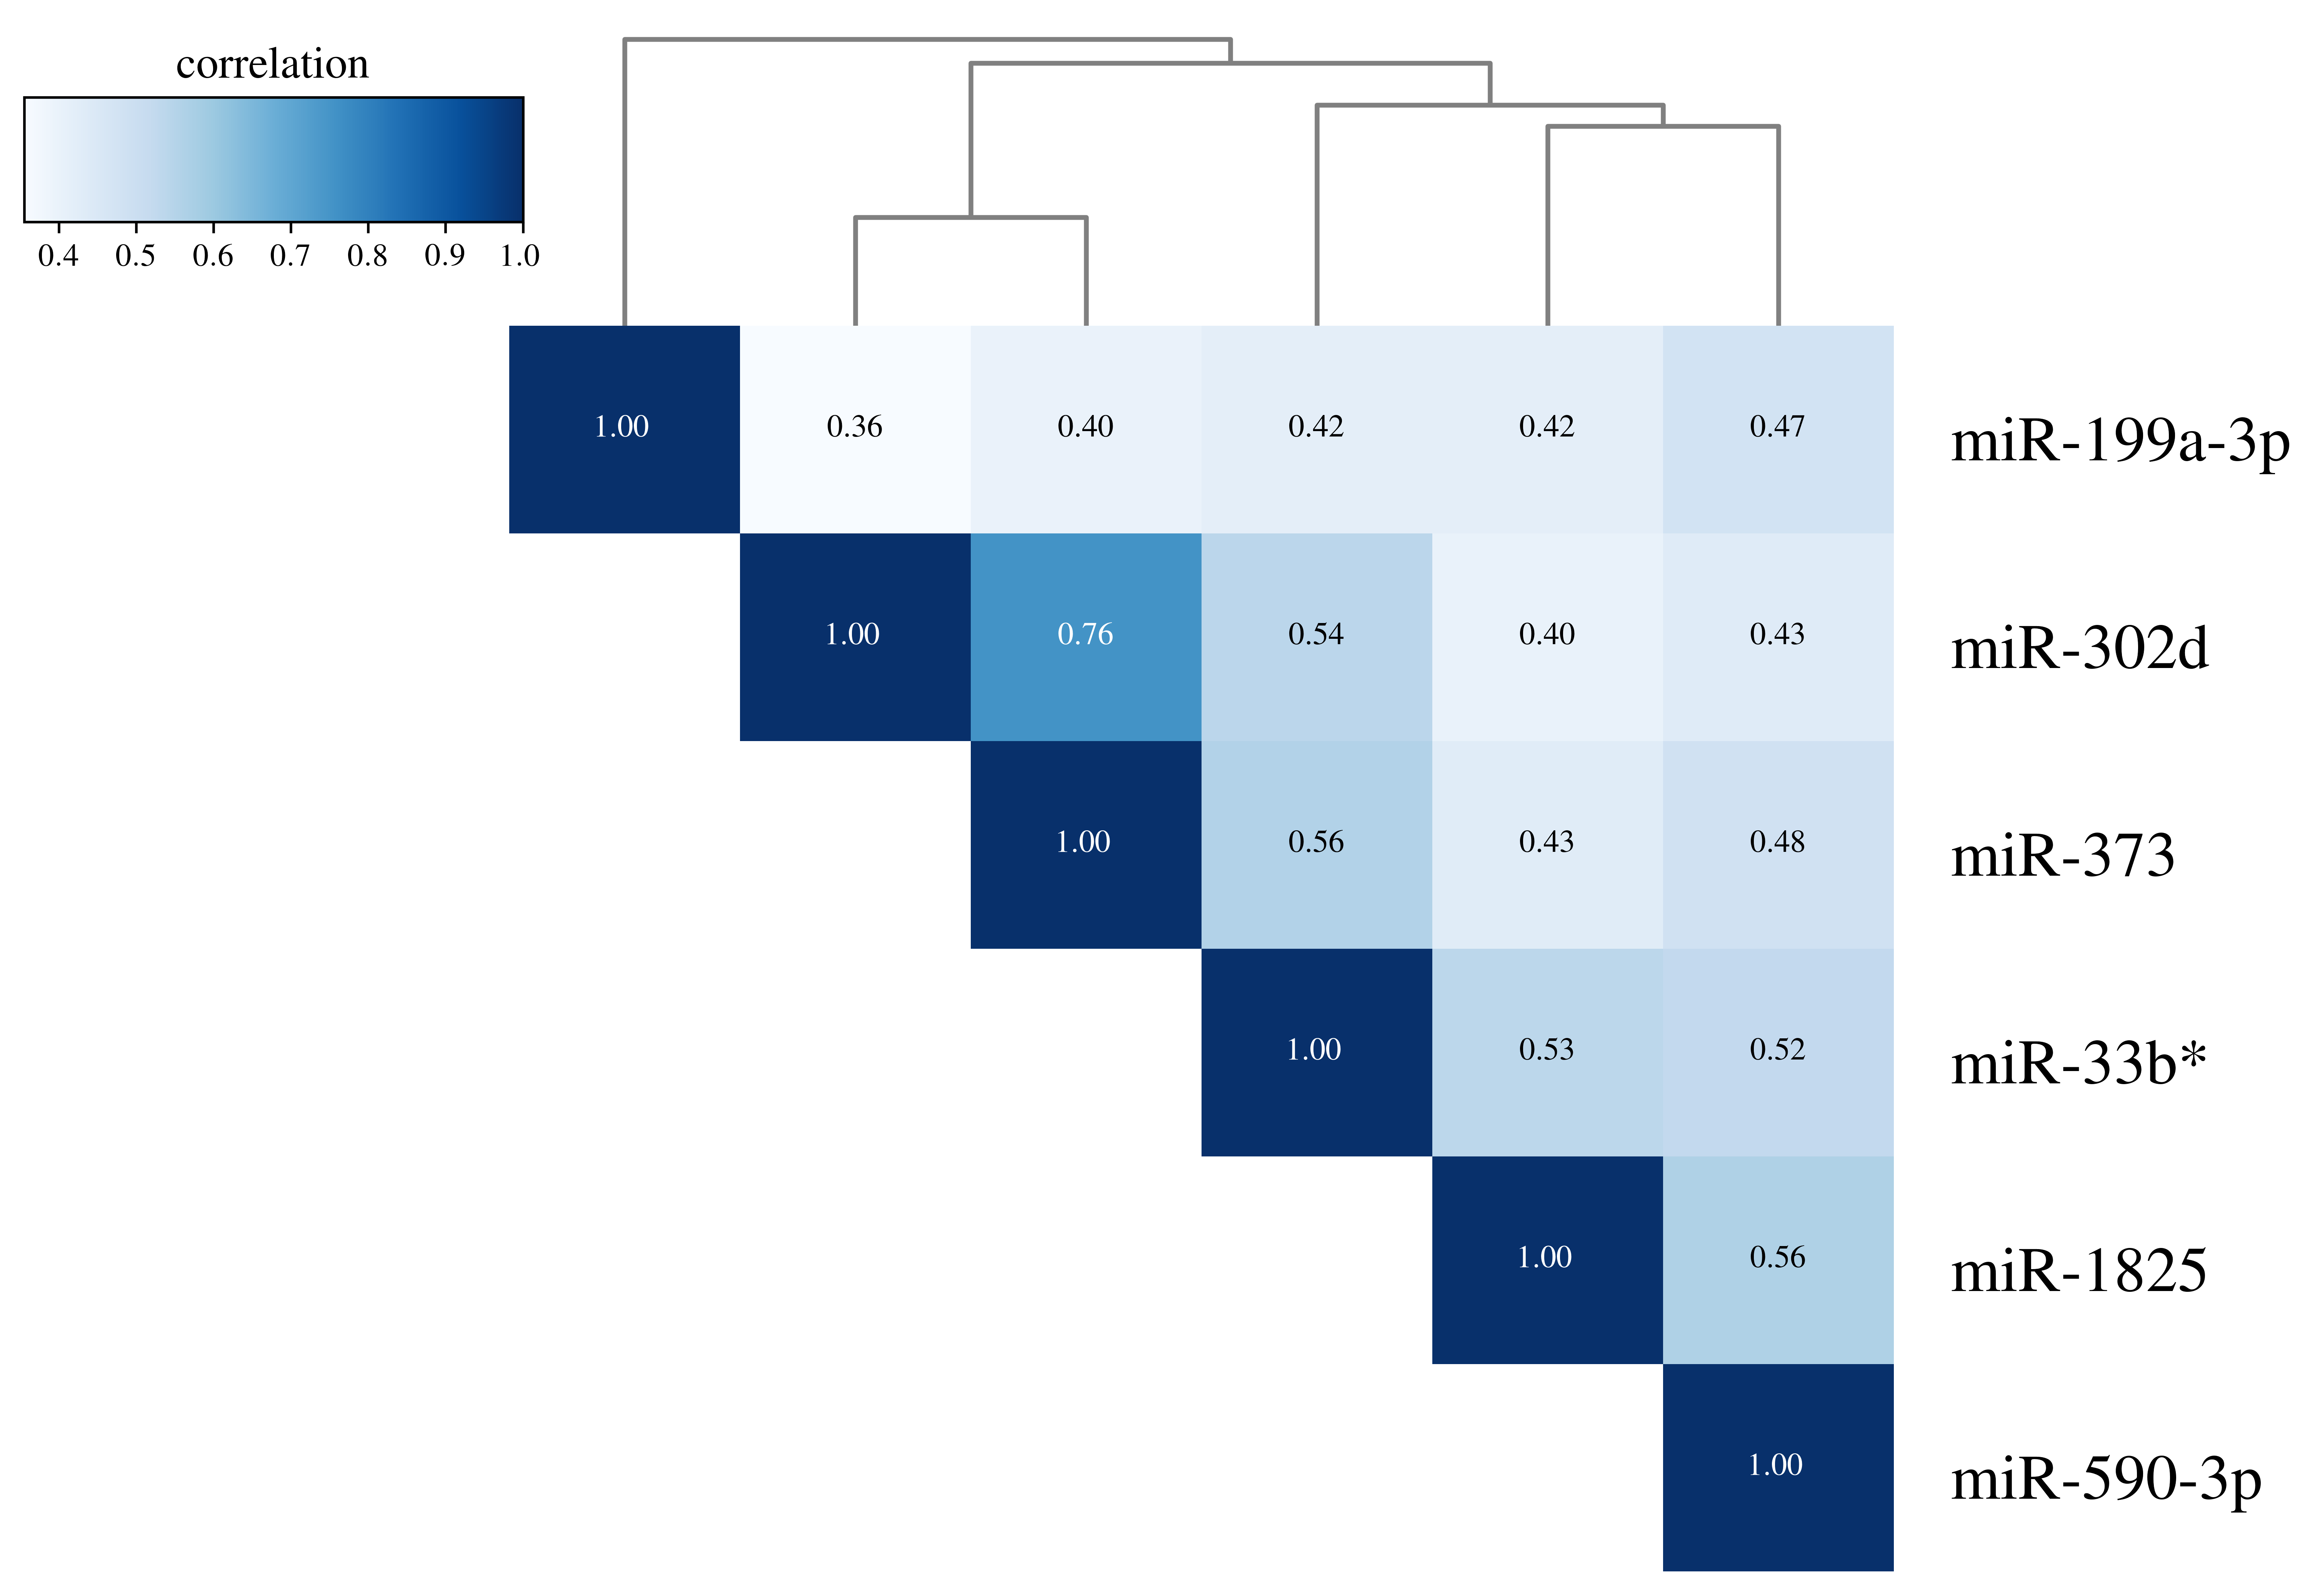

In [11]:
import scipy.cluster.hierarchy as sch

pandas_tocluster = NCBI_RNASeq.copy()
for miRNA in list(Consuelo_miRNA)+["mir.67"]:
    pandas_tocluster = pandas_tocluster.loc[pandas_tocluster[miRNA]>0].reset_index(drop=True)
pandas_tocluster.index = pandas_tocluster["NCBI_GeneID"].values
miRNA_FC_columns = ['mir.1825_FC', 'mir.199_FC', 'mir.302d_FC', 'mir.33b_FC', 'mir.373_FC', 'mir.590_FC']
pandas_tocluster = np.log2(pandas_tocluster[miRNA_FC_columns])
pandas_tocluster.columns = Consuelo_miRNA_names
pandas_tocluster.to_csv(geneset_result_dir+"correlation_expression_data.txt", sep="\t", index=True)
pandas_tocluster.corr().to_csv(geneset_result_dir+"correlation_pairwise_calculated_data.txt", sep="\t", index=True)
# get the correlation data
x = np.array(pandas_tocluster.corr())
x_columns = np.copy(Consuelo_miRNA_names)

# define the color gradient to use based on the provided name
n = len(x[0]); m = len(x)
cmap = plt.get_cmap("Blues")

# scale the max and min colors so that 0 is white/black
vmin= x.min()
vmax= x.max()

norm = mpl.colors.Normalize(vmin, vmax) ### adjust the max and min to scale these colors

# scale the Matplotlib window size
default_window_height = 9
default_window_width = 12

fig = plt.figure(figsize=(default_window_width,default_window_height),dpi=600)
color_bar_w = 0.015 ### Sufficient size to show

## calculate positions for all elements
# ax1, placement of dendrogram 1, on the left of the heatmap
[ax1_x, ax1_y, ax1_w, ax1_h] = [0.05,0.22,0.2,0.6]   ### The second value controls the position of the matrix relative to the bottom of the view
width_between_ax1_axr = -0.01
height_between_ax1_axc = -0.01 ### distance between the top color bar axis and the matrix

# axr, placement of row side colorbar
[axr_x, axr_y, axr_w, axr_h] = [0.31,0.1,color_bar_w,0.6] ### second to last controls the width of the side color bar - 0.015 when showing
axr_x = ax1_x + ax1_w + width_between_ax1_axr
axr_y = ax1_y; axr_h = ax1_h
width_between_axr_axm = -0.01

# axc, placement of column side colorbar
[axc_x, axc_y, axc_w, axc_h] = [0.4,0.63,0.5,color_bar_w] ### last one controls the hight of the top color bar - 0.015 when showing
axc_x = axr_x + axr_w + width_between_axr_axm
axc_y = ax1_y + ax1_h + height_between_ax1_axc
height_between_axc_ax2 = -0.01

# axm, placement of heatmap for the data matrix
[axm_x, axm_y, axm_w, axm_h] = [0.4,0.9,2.5,0.5]
axm_x = axr_x + axr_w + width_between_axr_axm
axm_y = ax1_y; axm_h = ax1_h
axm_w = axc_w

# ax2, placement of dendrogram 2, on the top of the heatmap
[ax2_x, ax2_y, ax2_w, ax2_h] = [0.3,0.72,0.6,0.15] ### last one controls height of the dendrogram
ax2_x = axr_x + axr_w + width_between_axr_axm
ax2_y = ax1_y + ax1_h + height_between_ax1_axc + axc_h + height_between_axc_ax2
ax2_w = axc_w

# axcb - placement of the color legend
[axcb_x, axcb_y, axcb_w, axcb_h] = [0.07,0.87,0.18,0.06]

# add the dendrogram
ax2 = fig.add_axes([ax2_x, ax2_y, ax2_w, ax2_h], frame_on=False) # frame_on may be False
Y2 = sch.linkage(x, method="average", metric="euclidean") ### array-clustering metric - 'average', 'single', 'centroid', 'complete'
Z2 = sch.dendrogram(Y2, orientation='top',color_threshold=0,above_threshold_color="grey")
ax2.set_xticks([]) ### Hides ticks
ax2.set_yticks([])
ax2.axis("off")

# Plot distance matrix.
axm = fig.add_axes([axm_x, axm_y, axm_w, axm_h],frame_on=False)  # axes for the data matrix
xt = x; idx2 = Z2['leaves']; xt = xt[:,idx2]; xt = xt[idx2[::-1],:]   # xt is transformed x
### taken from http://stackoverflow.com/questions/2982929/plotting-results-of-hierarchical-clustering-ontop-of-a-matrix-of-data-in-python/3011894#3011894
### mask the lower half of the heatmap
mask = np.tri(xt.shape[0], k=-1)[::-1]
xt = np.ma.array(xt, mask=mask)
im = axm.matshow(xt, aspect='auto', origin='lower', cmap=cmap, norm=norm)
cmap.set_bad('w') # default value is 'k'
### place the values
for i in np.arange(xt.shape[0]):
    for j in np.arange(xt.shape[1]):
        if not mask[i,j]:
            if xt[i,j]>0.7:
                axm.text(j, i, '%.2f' % xt[i,j], horizontalalignment='center', verticalalignment='center',color="white")
            else:
                axm.text(j, i, '%.2f' % xt[i,j], horizontalalignment='center', verticalalignment='center',color="black")
axm.set_xticks([]) ### Hides x-ticks
axm.set_yticks([])

# Add text
new_row_header=[]
for i in range(x.shape[0]):
    tmpIdx= idx2[::-1][i]
    axm.text(x.shape[1]-0.25, i-0.15, '  '+x_columns[tmpIdx], fontsize = 20)
    new_row_header.append(x_columns[tmpIdx])

# Plot color legend
axcb = fig.add_axes([axcb_x, axcb_y, axcb_w, axcb_h], frame_on=False)  # axes for colorbar
cb = mpl.colorbar.ColorbarBase(axcb, cmap=cmap, norm=norm, orientation='horizontal')
axcb.set_title("correlation", fontsize=14)

plt.savefig(geneset_result_dir+"Figure-ConsueloCluster-Clustering.pdf", bbox_inches="tight", transparent=True, dpi=600)
plt.show()

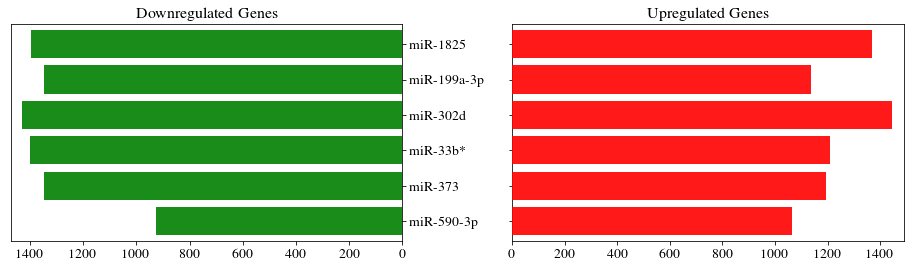

In [12]:
y_Consuelo = np.arange(len(Consuelo_miRNA))
fig, axes = plt.subplots(1,2, facecolor='w', edgecolor='k')
fig.set_size_inches(16,4)

axes[0].barh(y_Consuelo, [len(NCBI_DNG_geneset[miRNA]) for miRNA in Consuelo_miRNA], align='center', color='green', zorder=10, alpha=0.9)
axes[0].set_title('Downregulated Genes',fontweight='bold')
axes[1].barh(y_Consuelo, [len(NCBI_UPG_geneset[miRNA]) for miRNA in Consuelo_miRNA], align='center', color='red', zorder=10, alpha=0.9)
axes[1].set_title('Upregulated Genes',fontweight='bold')

axes[0].invert_xaxis()
axes[0].set(yticks=y_Consuelo, yticklabels=Consuelo_miRNA_names)
axes[1].set(yticks=y_Consuelo, yticklabels=[""]*len(y_Consuelo))
axes[0].yaxis.tick_right()
axes[0].invert_yaxis()
axes[1].invert_yaxis()

for ax in axes.flat:
    ax.margins(0.03)
    ax.grid(True)
for ax in axes.flat:
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label]):
        item.set_fontsize(16)
    for item in (ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(14)
axes[0].grid(False)
axes[1].grid(False)

fig.subplots_adjust(wspace=0.28, hspace=0.3)

plt.savefig(geneset_result_dir+"Figure-ConsueloCluster-DifferentiallyExpressedGenes.pdf", bbox_inches="tight", transparent=True, dpi=600)
plt.show()

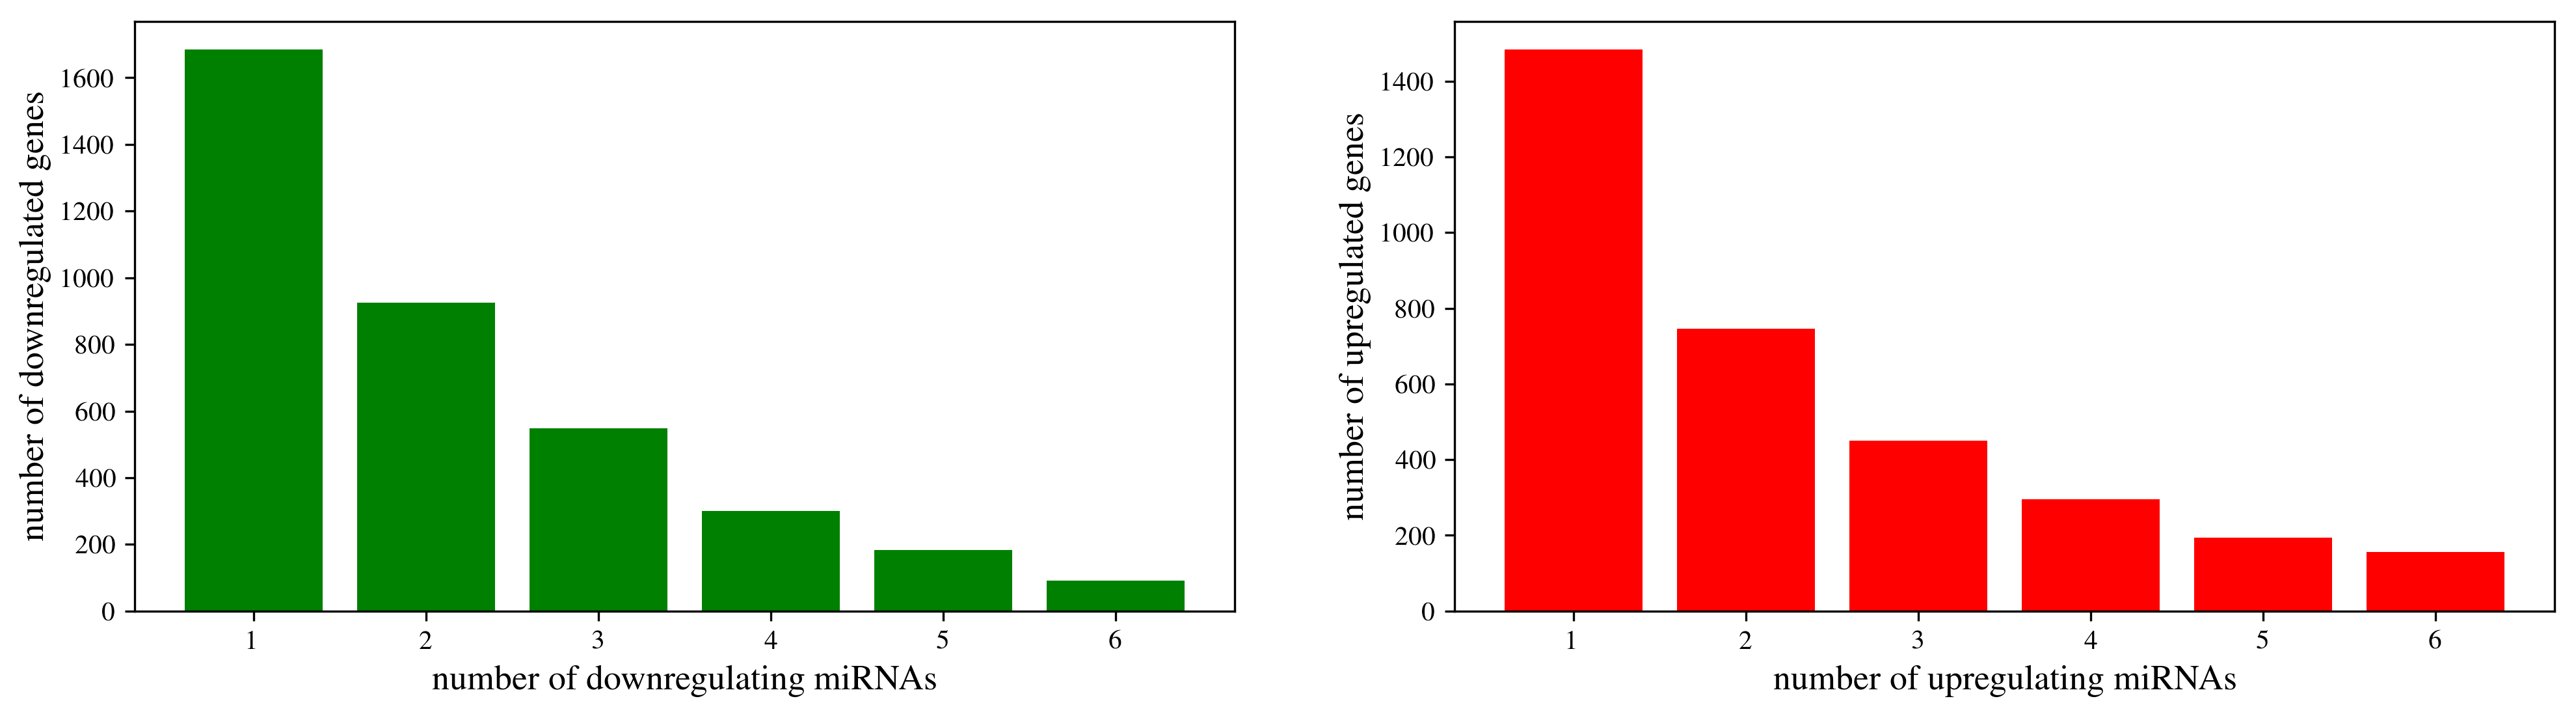

In [13]:
fig, axes = plt.subplots(1,2, facecolor='w', edgecolor='k', dpi=300)
fig.set_size_inches(16,4)

NCBI_DEG_DNG = []; NCBI_DEG_UPG = []
for miRNA in Consuelo_miRNA:
    NCBI_DEG_DNG = NCBI_DEG_DNG + list(set(NCBI_DNG_geneset[miRNA]))
    NCBI_DEG_UPG = NCBI_DEG_UPG + list(set(NCBI_UPG_geneset[miRNA]))
counts_DNG = Counter(NCBI_DEG_DNG); counts_UPG = Counter(NCBI_DEG_UPG); 

number_of_DNG_genes = []; number_of_UPG_genes = []
for overlap_cutoff in np.arange(1,7,1):
    NCBI_DE_DNG_genes = [k for k,v in counts_DNG.most_common() if v == overlap_cutoff ]
    NCBI_DE_UPG_genes = [k for k,v in counts_UPG.most_common() if v == overlap_cutoff ]
    number_of_DNG_genes.append(len(NCBI_DE_DNG_genes)); number_of_UPG_genes.append(len(NCBI_DE_UPG_genes))

np.savetxt(geneset_result_dir+"number_downregulated_genes.txt",np.array(list(number_of_DNG_genes)), delimiter="\n", fmt="%s")
axes[0].bar(np.arange(1,7,1), number_of_DNG_genes, color="green")
axes[0].set_xlabel("number of downregulating miRNAs", fontsize=13)
axes[0].set_ylabel("number of downregulated genes", fontsize=13)

np.savetxt(geneset_result_dir+"number_upregulated_genes.txt",np.array(list(number_of_UPG_genes)), delimiter="\n", fmt="%s")
axes[1].bar(np.arange(1,7,1), number_of_UPG_genes, color="red")
axes[1].set_xlabel("number of upregulating miRNAs", fontsize=13)
axes[1].set_ylabel("number of upregulated genes", fontsize=13)

plt.savefig(geneset_result_dir+"Figure-ConsueloCluster-NumberDifferentiallyExpressedGenes.pdf", bbox_inches="tight", transparent=True, dpi=1200)
plt.show()

In [77]:
overlap_cutoff = 6

print("NCBI COMMONLY DOWNREGULATED GENES")
NCBI_DE_genes = [k for k,v in counts_DNG.most_common() if v >= overlap_cutoff ]
print("Number of commonly downregulated genes: ", len(NCBI_DE_genes))
print(sorted(NCBI_DE_genes))
print(" ")
# np.savetxt(geneset_result_dir+"MoreThan"+str(overlap_cutoff)+"miRNAs_DNG.txt",np.array(list(NCBI_DE_genes)), delimiter="\n", fmt="%s")

print("NCBI COMMONLY UPREGULATED GENES (Consuelo Cluster)")
NCBI_DE_genes = [k for k,v in counts_UPG.most_common() if v >= overlap_cutoff ]
print("Number of commonly upregulated genes: ", len(NCBI_DE_genes))
print(sorted(NCBI_DE_genes))
# np.savetxt(geneset_result_dir+"MoreThan"+str(overlap_cutoff)+"miRNAs_UPG.txt",np.array(list(NCBI_DE_genes)), delimiter="\n", fmt="%s")

NCBI COMMONLY DOWNREGULATED GENES
Number of commonly downregulated genes:  92
['Abca1', 'Acadvl', 'Adamtsl2', 'Adra1b', 'Aldh1a2', 'Aldh1a3', 'Ankrd1', 'Apol9a', 'Aqp1', 'Aspn', 'Atp8b1', 'Bloc1s1', 'Cd34', 'Chrm2', 'Col15a1', 'Cox6a2', 'Cox8b', 'Csrp3', 'Dnase2', 'Eif4ebp3', 'Epas1', 'Epha3', 'Fabp1', 'Fam198b', 'Fgl2', 'Fxyd1', 'Galnt18', 'Gfod1', 'Gpc1', 'Hbegf', 'Heg1', 'Herpud1', 'Hhatl', 'Id4', 'Ifit2', 'Irx5', 'Islr', 'Itgb3', 'LOC100911723', 'LOC100911864', 'LOC102546973', 'LOC103689947', 'LOC103692066', 'LOC108348074', 'LOC684871', 'Mfap3l', 'Mief2', 'Mir22', 'Mir222', 'Mir3074', 'Mir568', 'Mir664-2', 'Mllt11', 'Mtmr4', 'Myadml2', 'Nov', 'Obscn', 'Ogdh', 'Olfml1', 'Olr63', 'Pde4b', 'Pdlim5', 'Postn', 'Prss23', 'Ptprg', 'RGD1311744', 'RGD1565536', 'RT1-CE4', 'RT1-CE5', 'RT1-S3', 'Rab3il1', 'Rarres2', 'Scp2', 'Selenbp1', 'Sema3d', 'Sln', 'Srpx2', 'Sspn', 'Stk38l', 'Tcap', 'Tcf21', 'Tgfb3', 'Thap7', 'Tm4sf1', 'Tmem159', 'Tmem185a', 'Tmem204', 'Tmem86a', 'Trim68', 'Trpc6', 'Twf2',

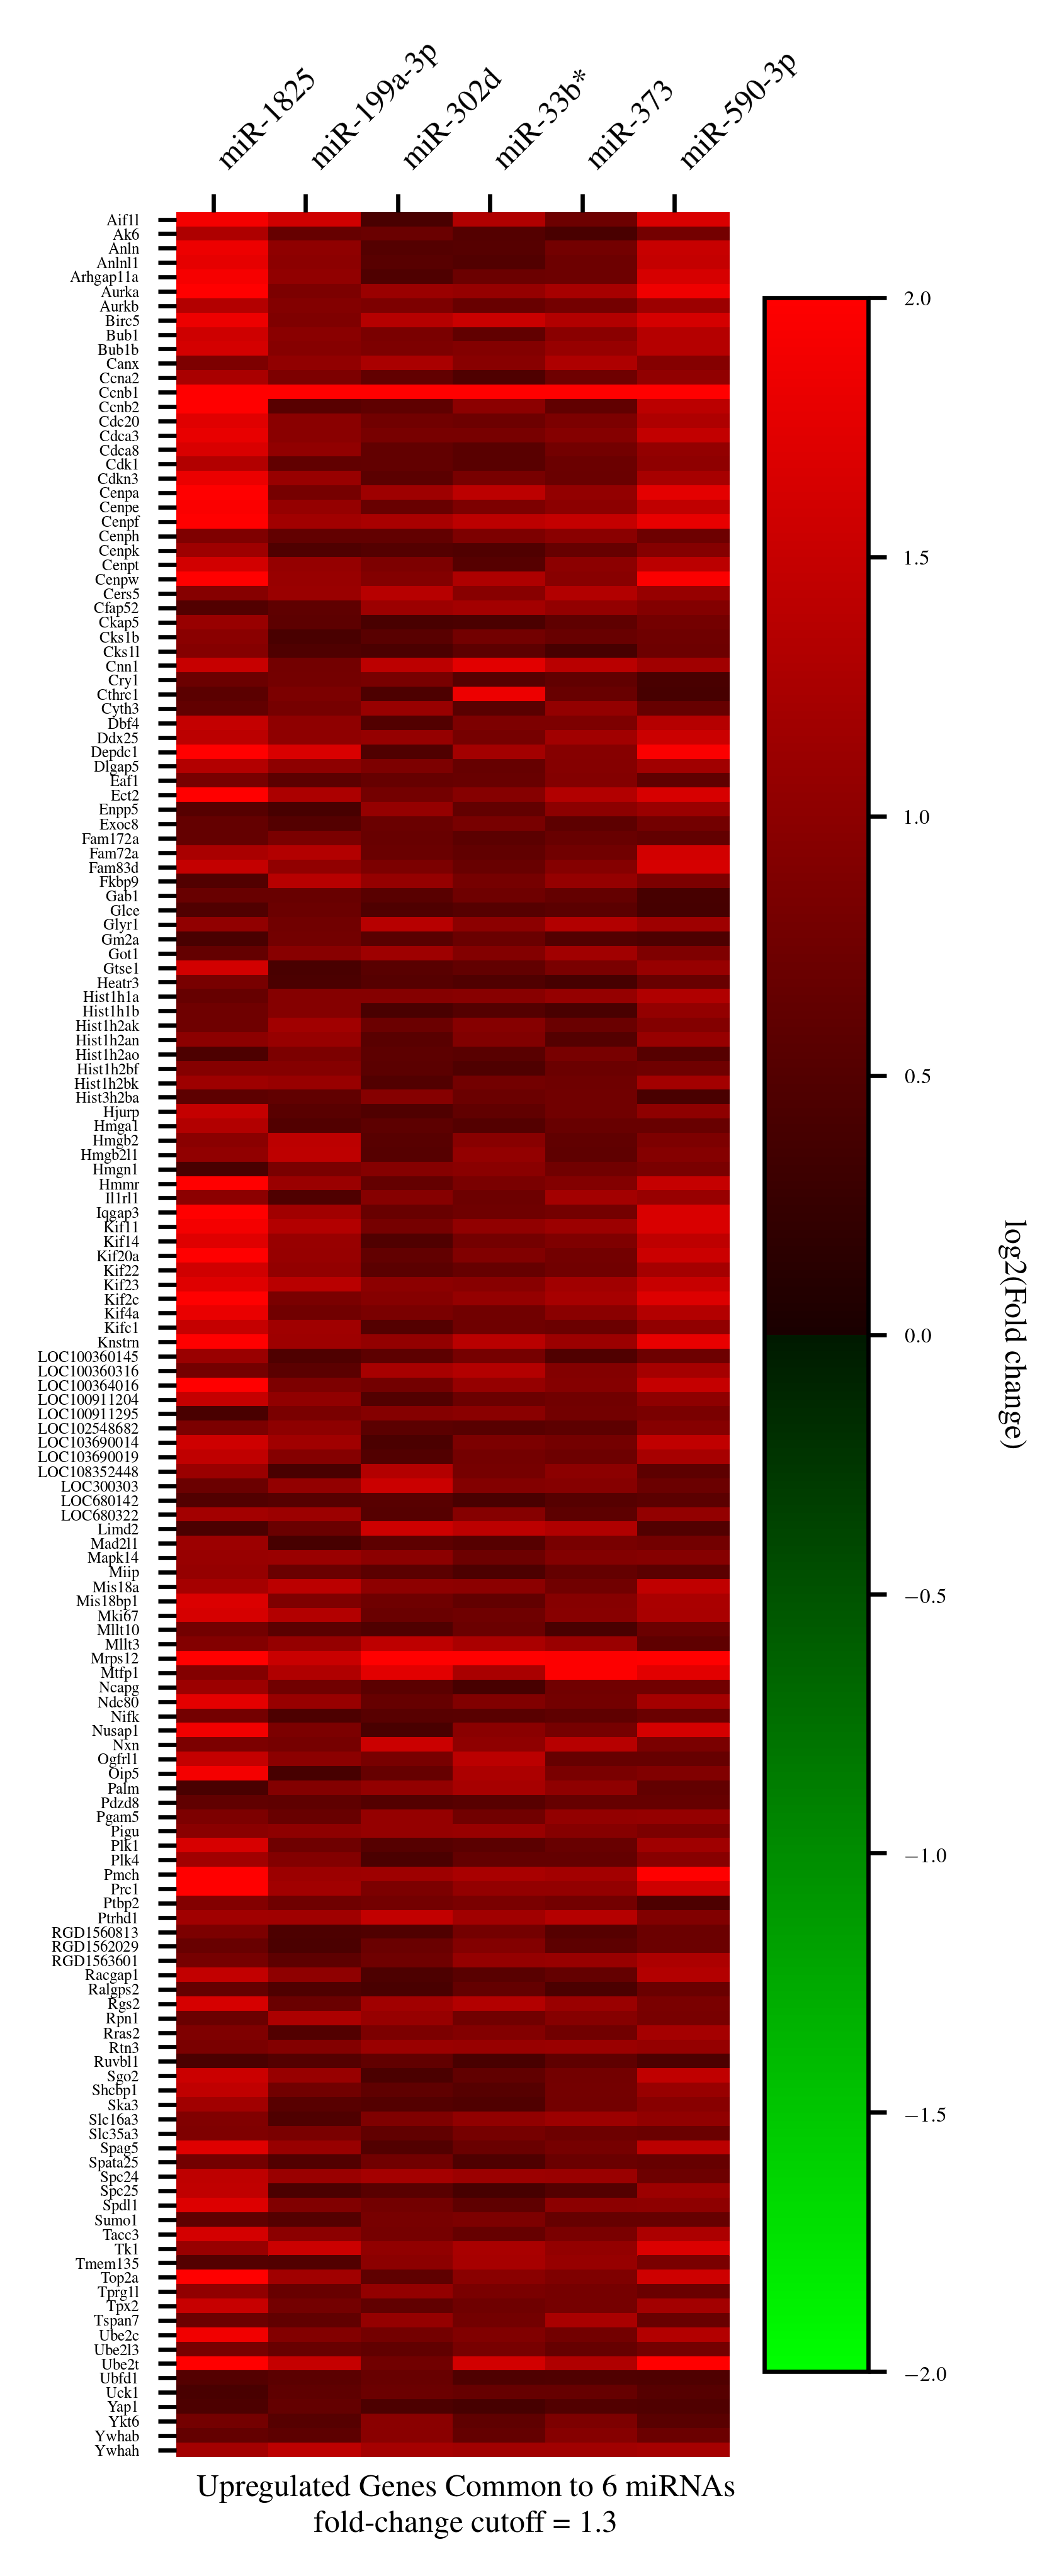

In [14]:
overlap_cutoff = 6
DE_genes = [k for k,v in counts_UPG.most_common() if v == overlap_cutoff ]

heatmap = pd.DataFrame(index=DE_genes,columns=Consuelo_miRNA)
for miRNA in Consuelo_miRNA:
    for genes in list(set(NCBI_UPG_geneset[miRNA])):
        if genes in DE_genes:
            heatmap[miRNA][genes] = np.log2(NCBI_RNASeq.loc[NCBI_RNASeq["NCBI_GeneID"]==genes,miRNA+"_FC"].values[0])
    for genes in list(set(NCBI_DNG_geneset[miRNA])):
        if genes in DE_genes:
            heatmap[miRNA][genes] = np.log2(NCBI_RNASeq.loc[NCBI_RNASeq["NCBI_GeneID"]==genes,miRNA+"_FC"].values[0])
heatmap = heatmap.fillna(0)
heatmap['name'] = [NCBI_RNASeq.loc[NCBI_RNASeq["NCBI_GeneID"]==genes,"NCBI_GeneID"].values[0] for genes in heatmap.index]
heatmap = heatmap.sort_values('name',ascending=True)
heatmap = heatmap.drop('name',1)
heatmap.index = [genes for genes in heatmap.index]

heatmap.to_csv(geneset_result_dir+"commonly_upregulated_genes.txt", sep="\t", index=True)

width_mm = 60.; width_inch   = width_mm/25.4
height_mm = 200.; height_inch  = height_mm/25.4

fig, ax1 = plt.subplots(1, 1,sharey=True, dpi=600)
fig.set_size_inches(width_inch,height_inch)

plot = ax1.pcolor(heatmap, cmap=RedBlackGreen(), vmin=-np.log2(4.), vmax=np.log2(4.))
ax1.set_frame_on(False)
ax1.set_ylim(top=len(heatmap.index.values))
ax1.set_yticks(np.arange(heatmap.shape[0]) + 0.5, minor=False)
ax1.set_xticks(np.arange(heatmap.shape[1]) + 0.4, minor=False)
ax1.set_xticklabels(Consuelo_miRNA_names, minor=False, fontsize=6)
ax1.set_yticklabels(heatmap.index.values, minor=False, fontsize=3)
ax1.grid(False)
ax1.invert_yaxis()
ax1.xaxis.tick_top()

#legend
cbar = plt.colorbar(plot)
cbar.ax.get_yaxis().labelpad = 15
cbar.set_label('log2(Fold change)', rotation=270, fontsize=6)
cbar.ax.tick_params(labelsize=4)

fig.text(0.45, 0.112, 'Upregulated Genes Common to '+str(overlap_cutoff)+' miRNAs', ha='center', fontsize=6)
fig.text(0.45, 0.10, 'fold-change cutoff = 1.3', ha='center', fontsize=6)

plt.setp(ax1.get_yticklabels(), visible=True)
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45, horizontalalignment='left')
plt.savefig(geneset_result_dir+"Figure-ConsueloCluster-CommonlyUpregulatedGenes.pdf", bbox_inches="tight", transparent=True, dpi=600)
plt.show()

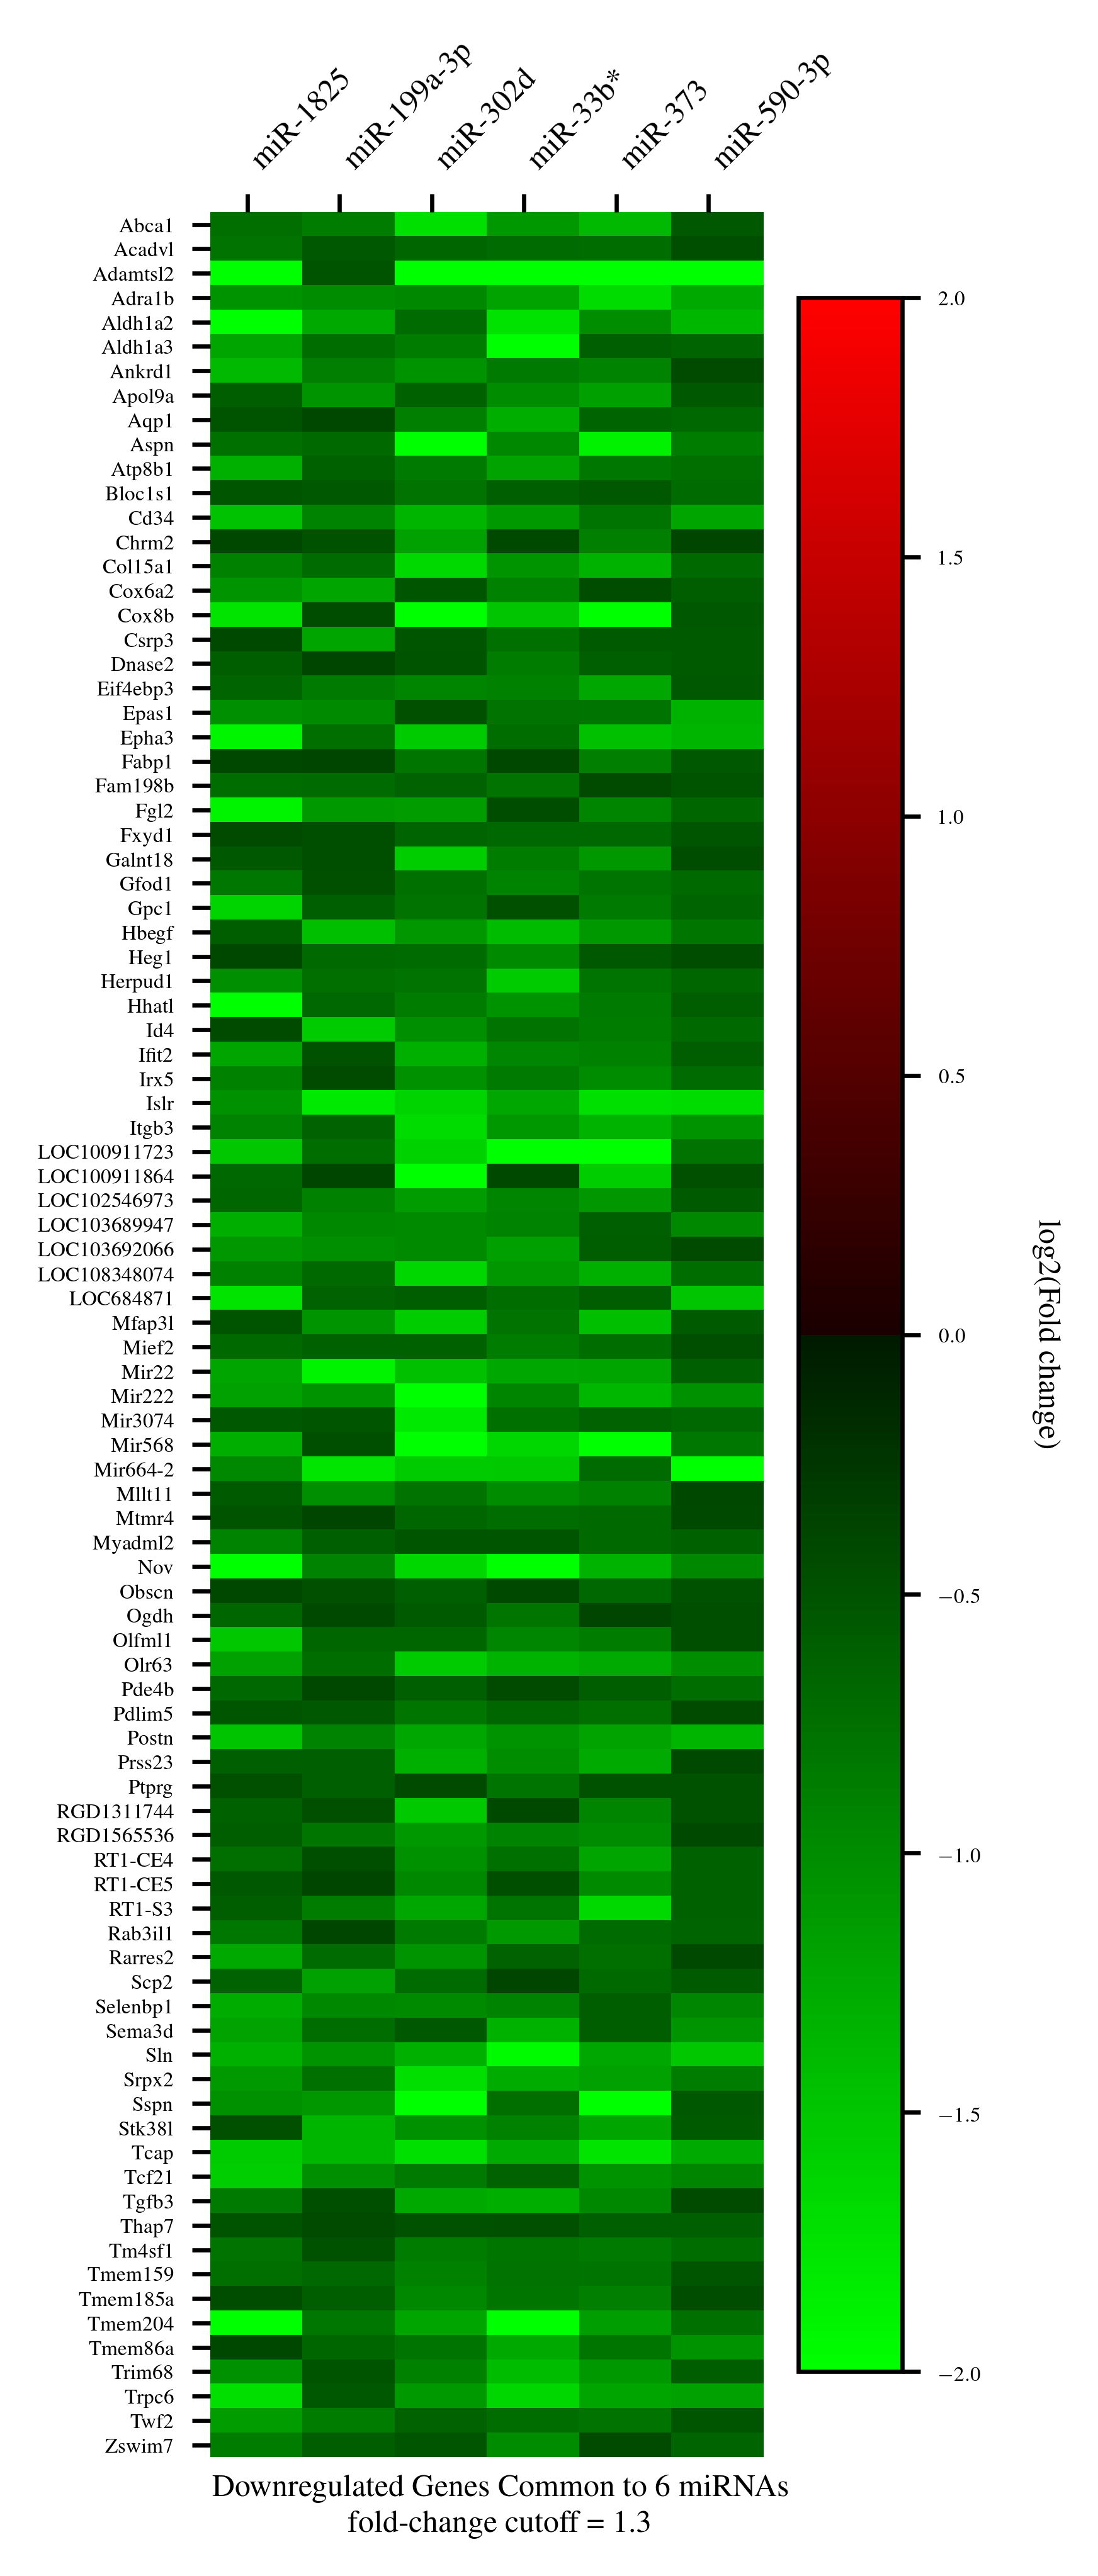

In [15]:
overlap_cutoff = 6
DE_genes = [k for k,v in counts_DNG.most_common() if v == overlap_cutoff ]

heatmap = pd.DataFrame(index=DE_genes,columns=Consuelo_miRNA)
for miRNA in Consuelo_miRNA:
    for genes in list(set(NCBI_UPG_geneset[miRNA])):
        if genes in DE_genes:
            heatmap[miRNA][genes] = np.log2(NCBI_RNASeq.loc[NCBI_RNASeq["NCBI_GeneID"]==genes,miRNA+"_FC"].values[0])
    for genes in list(set(NCBI_DNG_geneset[miRNA])):
        if genes in DE_genes:
            heatmap[miRNA][genes] = np.log2(NCBI_RNASeq.loc[NCBI_RNASeq["NCBI_GeneID"]==genes,miRNA+"_FC"].values[0])
heatmap = heatmap.fillna(0)
heatmap['name'] = [NCBI_RNASeq.loc[NCBI_RNASeq["NCBI_GeneID"]==genes,"NCBI_GeneID"].values[0] for genes in heatmap.index]
heatmap = heatmap.sort_values('name',ascending=True)
heatmap = heatmap.drop('name',1)
heatmap.index = [genes for genes in heatmap.index]

heatmap.to_csv(geneset_result_dir+"commonly_downregulated_genes.txt", sep="\t", index=True)

width_mm = 60.; width_inch   = width_mm/25.4
height_mm = 200.; height_inch  = height_mm/25.4

fig, ax1 = plt.subplots(1, 1,sharey=True, dpi=600)
fig.set_size_inches(width_inch,height_inch)

plot = ax1.pcolor(heatmap, cmap=RedBlackGreen(), vmin=-np.log2(4.), vmax=np.log2(4.))
ax1.set_frame_on(False)
ax1.set_ylim(top=len(heatmap.index.values))
ax1.set_yticks(np.arange(heatmap.shape[0]) + 0.5, minor=False)
ax1.set_xticks(np.arange(heatmap.shape[1]) + 0.4, minor=False)
ax1.set_xticklabels(Consuelo_miRNA_names, minor=False, fontsize=6)
ax1.set_yticklabels(heatmap.index.values, minor=False, fontsize=4)
ax1.grid(False)
ax1.invert_yaxis()
ax1.xaxis.tick_top()

#legend
cbar = plt.colorbar(plot)
cbar.ax.get_yaxis().labelpad = 15
cbar.set_label('log2(Fold change)', rotation=270, fontsize=6)
cbar.ax.tick_params(labelsize=4)

fig.text(0.45, 0.112, 'Downregulated Genes Common to '+str(overlap_cutoff)+' miRNAs', ha='center', fontsize=6)
fig.text(0.45, 0.10, 'fold-change cutoff = 1.3', ha='center', fontsize=6)

plt.setp(ax1.get_yticklabels(), visible=True)
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45, horizontalalignment='left')
plt.savefig(geneset_result_dir+"Figure-ConsueloCluster-CommonlyDownregulatedGenes.pdf", bbox_inches="tight", transparent=True, dpi=600)
plt.show()

In [17]:
# background genes
NCBI_background = NCBI_RNASeq['NCBI_GeneID'].values

# Homologene: Mouse to Rat
Homologene = pd.read_csv(dictionary+"homologene.data",delimiter='\t',header=-1)
Homologene.columns = ["ID","TaxID","EntrezID","Name","ProteinGI","RefSeqP"]
Organism1 = 10090
Organism2 = 10116
Dic1 = Homologene[Homologene["TaxID"]==Organism1][["ID","Name"]]
Dic2 = Homologene[Homologene["TaxID"]==Organism2][["ID","Name"]]
Homology = Dic1.merge(Dic2[["ID","Name"]], on=["ID"], how='inner').drop("ID",1)
Homology.columns = ["Mouse","Rat"]
del(Homologene)

# Rat gene information
Rattus_norvegicus = pd.read_csv(dictionary+"Rattus_norvegicus.gene_info",delimiter='\t')

# miRNA-mRNA interaction network
TargetScan = pd.read_csv(dictionary+"TargetScan_HumanMiRNA.txt",delimiter='\t',header=-1)
TargetScan.columns = ["Mouse ID","Seed","Score"]

# Giacca_miRNAs = ["hsa-miR-1825","hsa-miR-199a-3p","hsa-miR-302d","hsa-miR-33b","hsa-miR-373","hsa-miR-590-3p"]
Giacca_seeds = ["CCAGUGC","CAGUAGU","AAGUGCU","UGCAUUG","AAGUGCU","AAUUUUA"]

# Keep only predictions for miRNAs whose RNASeq data is available
TargetScan = TargetScan[TargetScan["Seed"].isin(Giacca_seeds)].reset_index(drop=True)
TargetScan.columns = ['Mouse','Seed','Score']
# Translate mouse names into rat names
TargetScan = TargetScan.merge(Homology[["Mouse","Rat"]], on=["Mouse"], how='left')
for i in TargetScan.loc[TargetScan['Rat'].isnull()].index.values:
    if TargetScan.loc[i].Mouse in Rattus_norvegicus.Symbol.values:
        TargetScan.loc[i,'Rat'] = TargetScan.loc[i,'Mouse']
TargetScan=TargetScan.dropna()
TargetScan = TargetScan.drop(["Mouse"],1)
TargetScan = TargetScan[["Seed","Rat","Score"]]

print (Counter(TargetScan.Seed.values))

# Keep only predictions for genes that are expressed in the empty case
TargetScan = TargetScan[TargetScan["Rat"].isin(NCBI_background)].reset_index(drop=True)
print (len(TargetScan))

print (Counter(TargetScan.Seed.values))

Counter({'AAUUUUA': 6463, 'CCAGUGC': 3262, 'AAGUGCU': 3128, 'UGCAUUG': 3128, 'CAGUAGU': 2251})
15446
Counter({'AAUUUUA': 5397, 'CCAGUGC': 2765, 'AAGUGCU': 2715, 'UGCAUUG': 2629, 'CAGUAGU': 1940})


In [18]:
### find a way such that only those targets that are downregulated in each miRNA is shown
target_dump_list = []
for miRNA in np.arange(len(Consuelo_miRNA)):
    DNG_miRNA = sorted([genes for genes in NCBI_DNG_geneset[Consuelo_miRNA[miRNA]]])
    for mRNA_index in TargetScan.loc[TargetScan['Seed']==Giacca_seeds[miRNA]].index.values:
        if TargetScan.loc[mRNA_index,'Rat'] in DNG_miRNA:
            target_dump_list.append((Consuelo_miRNA_names[miRNA],TargetScan.loc[mRNA_index,'Rat'],TargetScan.loc[mRNA_index,'Score']))

target_list = pd.DataFrame(target_dump_list)
target_list.columns = ["Seed","Rat","Score"]
# keep only the lowest scores if duplicates exists
target_list = target_list.sort_values('Score', ascending=True).drop_duplicates(["Seed","Rat"]).sort_index()
del target_dump_list

NCBI_target_list = target_list.sort_values("Seed").reset_index(drop=True)

In [ ]:
actin_genes = np.loadtxt(result_dir+"ActinPolymerization/actin_genes.txt",dtype=bytes,delimiter='\n').astype(str)
actin_columns = ['lipo', 'mir.1825', 'mir.199', 'mir.302d', 'mir.33b', 'mir.373', 'mir.590', 'mir.67',
                 'mir.1825_FC', 'mir.199_FC', 'mir.302d_FC', 'mir.33b_FC', 'mir.373_FC', 'mir.590_FC', 
                 'mir.1825_target', 'mir.199_target', 'mir.302d_target', 'mir.33b_target', 'mir.373_target', 'mir.590_target']
miRNA_seed_sequence = ["--", "CCAGUGC", "CAGUAGU", "--","AAGUGCU","UGCAUUG","AAGUGCU","AAUUUUA", "--"]

actin_mapping = pd.DataFrame(index=actin_genes,columns=actin_columns)
for genes in actin_mapping.index.values:
    for miRNA in Consuelo_miRNA:
        RPKM = NCBI_geneset1.loc[NCBI_geneset1["NCBI_GeneID"]==genes,miRNA].values
        seed = miRNA_seed_sequence[np.where(miRNA_name==miRNA)[0][0]]
        if (len(RPKM)>0):
            actin_mapping['lipo'][genes] = NCBI_geneset1.loc[NCBI_geneset1["NCBI_GeneID"]==genes,'lipo'].values[0]
            actin_mapping['mir.67'][genes] = NCBI_geneset1.loc[NCBI_geneset1["NCBI_GeneID"]==genes,'mir.67'].values[0]
            actin_mapping[miRNA][genes] = NCBI_geneset1.loc[NCBI_geneset1["NCBI_GeneID"]==genes,miRNA].values[0]
            actin_mapping[miRNA+"_FC"][genes] = np.log2(NCBI_geneset1.loc[NCBI_geneset1["NCBI_GeneID"]==genes,miRNA+"_FC"].values[0])
            try:
                actin_mapping[miRNA+"_target"][genes] = TargetScan.loc[TargetScan["Seed"]==seed].loc[TargetScan["Rat"]==genes,"Score"].values[0]
            except:
                actin_mapping[miRNA+"_target"][genes] = 0.0
actin_mapping = actin_mapping.fillna("-")
actin_mapping.to_csv(result_dir+"ActinPolymerization/actin_mapping.txt", sep="\t", index=True)

In [ ]:
hippo_genes = np.loadtxt(result_dir+"HippoPathway/hippo_genes.txt",dtype=bytes,delimiter='\n').astype(str)
hippo_columns = ['lipo', 'mir.1825', 'mir.199', 'mir.302d', 'mir.33b', 'mir.373', 'mir.590', 'mir.67',
                 'mir.1825_FC', 'mir.199_FC', 'mir.302d_FC', 'mir.33b_FC', 'mir.373_FC', 'mir.590_FC', 
                 'mir.1825_target', 'mir.199_target', 'mir.302d_target', 'mir.33b_target', 'mir.373_target', 'mir.590_target']
miRNA_seed_sequence = ["--", "CCAGUGC", "CAGUAGU", "--","AAGUGCU","UGCAUUG","AAGUGCU","AAUUUUA", "--"]

hippo_mapping = pd.DataFrame(index=hippo_genes,columns=hippo_columns)

for genes in hippo_mapping.index.values:
    for miRNA in Consuelo_miRNA:
        RPKM = NCBI_geneset1.loc[NCBI_geneset1["NCBI_GeneID"]==genes,miRNA].values
        seed = miRNA_seed_sequence[np.where(miRNA_name==miRNA)[0][0]]
        if (len(RPKM)>0):
            hippo_mapping['lipo'][genes] = NCBI_geneset1.loc[NCBI_geneset1["NCBI_GeneID"]==genes,'lipo'].values[0]
            hippo_mapping['mir.67'][genes] = NCBI_geneset1.loc[NCBI_geneset1["NCBI_GeneID"]==genes,'mir.67'].values[0]
            hippo_mapping[miRNA][genes] = NCBI_geneset1.loc[NCBI_geneset1["NCBI_GeneID"]==genes,miRNA].values[0]
            hippo_mapping[miRNA+"_FC"][genes] = np.log2(NCBI_geneset1.loc[NCBI_geneset1["NCBI_GeneID"]==genes,miRNA+"_FC"].values[0])
            try:
                hippo_mapping[miRNA+"_target"][genes] = TargetScan.loc[TargetScan["Seed"]==seed].loc[TargetScan["Rat"]==genes,"Score"].values[0]
            except:
                hippo_mapping[miRNA+"_target"][genes] = 0.0
hippo_mapping = hippo_mapping.fillna("-")
hippo_mapping.to_csv(result_dir+"HippoPathway/hippo_mapping.txt", sep="\t", index=True)

In [46]:
inquiry = "Tmsb4x"

print("NCBI Expression")
print(NCBI_RNASeq.loc[NCBI_RNASeq["NCBI_GeneID"]==inquiry,NCBI_RNASeq.columns[3:9]].round(decimals=1).to_string(index=False))
print("NCBI RPKM cut-off")
print(NCBI_RNASeq.loc[NCBI_RNASeq["NCBI_GeneID"]==inquiry,NCBI_RNASeq.columns[10:16]].round(decimals=1).to_string(index=False))
print("NCBI Upregulation")
print(NCBI_RNASeq.loc[NCBI_RNASeq["NCBI_GeneID"]==inquiry,NCBI_RNASeq.columns[16:22]].round(decimals=1).to_string(index=False))
print("NCBI Downregulation")
print((1./NCBI_RNASeq.loc[NCBI_RNASeq["NCBI_GeneID"]==inquiry,NCBI_RNASeq.columns[16:22]]).round(decimals=1).to_string(index=False))
print(" ")

for seeds in NCBI_target_list.loc[NCBI_target_list["Rat"]==inquiry,"Seed"].values:
    print ("NCBI: ", inquiry, Consuelo_miRNA_names[list(Consuelo_miRNA_names).index(seeds)])

NCBI Expression
mir.1825  mir.199  mir.302d  mir.33b  mir.373  mir.590
   554.0    322.2     575.0    671.8    562.4    725.2
NCBI RPKM cut-off
mir.1825_RPKM  mir.199_RPKM  mir.302d_RPKM  mir.33b_RPKM  mir.373_RPKM  mir.590_RPKM
            1             1              1             1             1             1
NCBI Upregulation
mir.1825_FC  mir.199_FC  mir.302d_FC  mir.33b_FC  mir.373_FC  mir.590_FC
        0.8         0.5          0.9         1.0         0.8         1.1
NCBI Downregulation
mir.1825_FC  mir.199_FC  mir.302d_FC  mir.33b_FC  mir.373_FC  mir.590_FC
        1.2         2.1          1.2         1.0         1.2         0.9
 
NCBI:  Tmsb4x miR-199a-3p


In [16]:
print(NCBI_RNASeq.columns)

Index(['RNASeq_Entry', 'NCBI_GeneID', 'lipo', 'mir.1825', 'mir.199',
       'mir.302d', 'mir.33b', 'mir.373', 'mir.590', 'mir.67', 'mir.1825_RPKM',
       'mir.199_RPKM', 'mir.302d_RPKM', 'mir.33b_RPKM', 'mir.373_RPKM',
       'mir.590_RPKM', 'mir.1825_FC', 'mir.199_FC', 'mir.302d_FC',
       'mir.33b_FC', 'mir.373_FC', 'mir.590_FC'],
      dtype='object')
